# Intro

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Enterprise Data Science Group Project/airplane_train_processed_normalized.csv')

In [4]:
df.head(5)

cat__Gender_Female  cat__Gender_Male  cat__Customer Type_Loyal Customer  \
0                 0.0               1.0                                1.0   
1                 0.0               1.0                                0.0   
2                 1.0               0.0                                1.0   
3                 1.0               0.0                                1.0   
4                 0.0               1.0                                1.0   

   cat__Customer Type_disloyal Customer  cat__Type of Travel_Business travel  \
0                                   0.0                                  0.0   
1                                   1.0                                  1.0   
2                                   0.0                                  1.0   
3                                   0.0                                  1.0   
4                                   0.0                                  1.0   

   cat__Type of Travel_Personal Travel  cat__Class_Business  cat__Class_Eco  \
0                                  1.0                  0.0             0.0   
1                                  0.0                  1.0             0.0   
2                                  0.0                  1.0             0.0   
3                                  0.0                  1.0             0.0   
4                                  0.0                  1.0             0.0   

   cat__Class_Eco Plus  std__Age  ...  remainder__Online boarding  \
0                  1.0 -1.746813  ...                           3   
1                  0.0 -0.952197  ...                           3   
2                  0.0 -0.885979  ...                           5   
3                  0.0 -0.952197  ...                           2   
4                  0.0  1.431649  ...                           5   

   remainder__Seat comfort  remainder__Inflight entertainment  \
0                        5                                  5   
1                        1                                  1   
2                        5                                  5   
3                        2                                  2   
4                        5                                  3   

   remainder__On-board service  remainder__Leg room service  \
0                            4                            3   
1                            1                            5   
2                            4                            3   
3                            2                            5   
4                            3                            4   

   remainder__Baggage handling  remainder__Checkin service  \
0                            4                           4   
1                            3                           1   
2                            4                           4   
3                            3                           1   
4                            4                           3   

   remainder__Inflight service  remainder__Cleanliness  \
0                            5                       5   
1                            4                       1   
2                            4                       5   
3                            4                       2   
4                            3                       3   

   remainder__satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 28 columns]

In [5]:
df.columns

Index(['cat__Gender_Female', 'cat__Gender_Male',
       'cat__Customer Type_Loyal Customer',
       'cat__Customer Type_disloyal Customer',
       'cat__Type of Travel_Business travel',
       'cat__Type of Travel_Personal Travel', 'cat__Class_Business',
       'cat__Class_Eco', 'cat__Class_Eco Plus', 'std__Age',
       'std__Flight Distance', 'std__Departure Delay in Minutes',
       'std__Arrival Delay in Minutes', 'remainder__Inflight wifi service',
       'remainder__Departure/Arrival time convenient',
       'remainder__Ease of Online booking', 'remainder__Gate location',
       'remainder__Food and drink', 'remainder__Online boarding',
       'remainder__Seat comfort', 'remainder__Inflight entertainment',
       'remainder__On-board service', 'remainder__Leg room service',
       'remainder__Baggage handling', 'remainder__Checkin service',
       'remainder__Inflight service', 'remainder__Cleanliness',
       'remainder__satisfaction'],
      dtype='object')

In [6]:
#Removing the highly correlated columns like 'cat__Gender_Male','cat__Customer Type_disloyal Customer','cat__Type of Travel_Personal Travel','cat__Class_Eco',
df = df[['cat__Gender_Female','cat__Customer Type_Loyal Customer',
       'cat__Type of Travel_Business travel',
        'cat__Class_Business', 'cat__Class_Eco Plus', 'std__Age',
       'std__Flight Distance', 'std__Departure Delay in Minutes',
       'std__Arrival Delay in Minutes', 'remainder__Inflight wifi service',
       'remainder__Departure/Arrival time convenient',
       'remainder__Ease of Online booking', 'remainder__Gate location',
       'remainder__Food and drink', 'remainder__Online boarding',
       'remainder__Seat comfort', 'remainder__Inflight entertainment',
       'remainder__On-board service', 'remainder__Leg room service',
       'remainder__Baggage handling', 'remainder__Checkin service',
       'remainder__Inflight service', 'remainder__Cleanliness',
       'remainder__satisfaction']]

In [7]:
X = df[['cat__Gender_Female','cat__Customer Type_Loyal Customer',
       'cat__Type of Travel_Business travel',
        'cat__Class_Business', 'cat__Class_Eco Plus', 'std__Age',
       'std__Flight Distance', 'std__Departure Delay in Minutes',
       'std__Arrival Delay in Minutes', 'remainder__Inflight wifi service',
       'remainder__Departure/Arrival time convenient',
       'remainder__Ease of Online booking', 'remainder__Gate location',
       'remainder__Food and drink', 'remainder__Online boarding',
       'remainder__Seat comfort', 'remainder__Inflight entertainment',
       'remainder__On-board service', 'remainder__Leg room service',
       'remainder__Baggage handling', 'remainder__Checkin service',
       'remainder__Inflight service', 'remainder__Cleanliness']]
y = df['remainder__satisfaction'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

# LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
model = lr.fit(X_train,y_train)

In [48]:
y_test_pred = model.predict(X_test)

In [49]:
metrics.accuracy_score(y_test, y_test_pred)

0.878218346786072

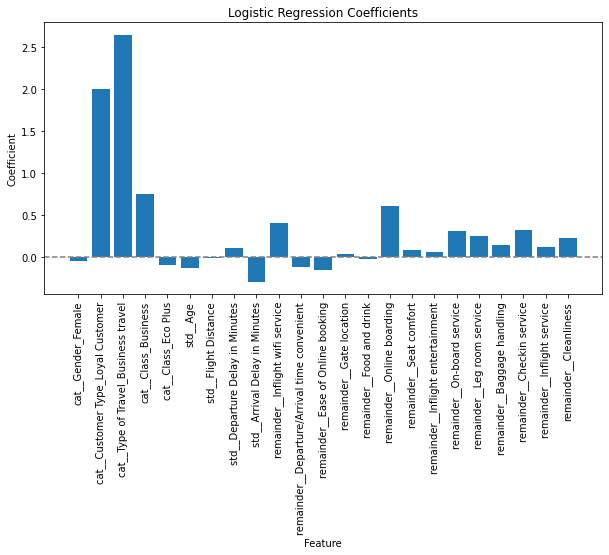

In [50]:
# assume model is a fitted logistic regression model
coefs = model.coef_.ravel()
feature_names = X_train.columns

# create a bar chart of coefficients
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(feature_names, coefs)
ax.axhline(y=0, color='gray', linestyle='--')
ax.set_xlabel('Feature')
ax.set_ylabel('Coefficient')
ax.set_title('Logistic Regression Coefficients')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 257.44, 'Predicted label')

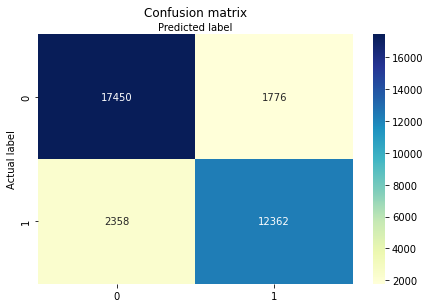

In [51]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
class_names=['neutral or dissatisfied','satisfied'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [52]:
from sklearn.metrics import precision_score, recall_score

# Assuming y_test is the true labels for X_test
precision = precision_score(y_test, y_test_pred,pos_label='satisfied')
recall = recall_score(y_test, y_test_pred,pos_label='satisfied')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8743811005799972
Recall: 0.8398097826086957


The model has  good precision and recall.

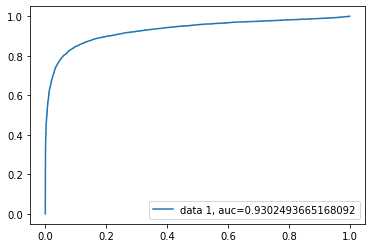

In [53]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='satisfied')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Support Vector Machine

In [54]:
from sklearn.svm import SVC
svc_model = SVC()

In [55]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [56]:
predictions = model.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[17450  1776]
 [ 2358 12362]]


                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.91      0.89     19226
              satisfied       0.87      0.84      0.86     14720

               accuracy                           0.88     33946
              macro avg       0.88      0.87      0.88     33946
           weighted avg       0.88      0.88      0.88     33946



In [58]:
metrics.accuracy_score(y_test, predictions)

0.878218346786072

Text(0.5, 257.44, 'Predicted label')

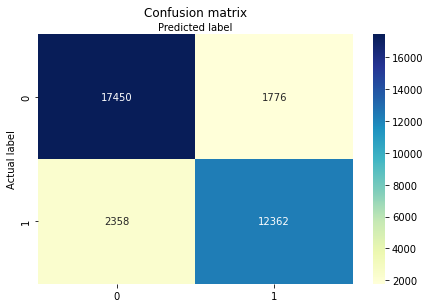

In [60]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
class_names=['neutral or dissatisfied','satisfied'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [21]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state=15)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [22]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9490843870979369 {'max_depth': 15}


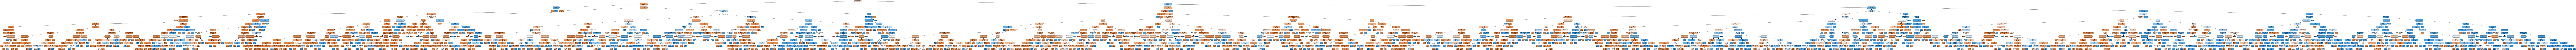

In [23]:
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw
import graphviz  
from sklearn.tree import export_graphviz

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = export_graphviz(tree_model, out_file=f, max_depth = 15,
                         impurity = True, feature_names = X_train.columns,
                         rounded = True, filled= True )
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree.png'])
# Annotating chart with PIL
img = Image.open("tree.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

In [24]:
tree_model.score(X_test, y_test)

0.9497142520473694

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


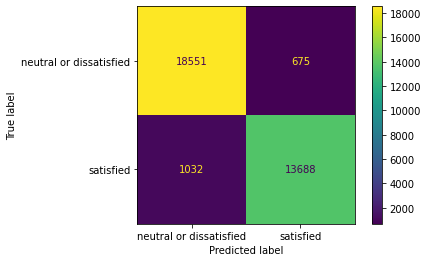

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree_model,X_test,y_test)

**Conclusions**

Accuracy in train dataset - 0.9489 

Best accuracy with 'max_depth': 15

Accuracy in test dataset - 0.9494

# Random forest

In [28]:
def search_param(model, param, X_train, y_train, X_val, y_val, area=range(1, 11), msg=True, plot=True, seed=None):
    import matplotlib.pyplot as plt
    import time
    score_list = []
    if msg:
        print('#     accuracy  time')
    for i in area:
        start = time.time()
        rfc = eval(model + '(' + param + '=' + str(i) + ', random_state=' + str(seed) + ')')
        rfc.fit(X_train, y_train)
        s = rfc.score(X_val, y_val)
        end = time.time()
        score_list.append(s)
        if msg:
            print("%-3d %10f  %7f" % (i, s, end - start))
    if plot:
        plt.plot(list(area), score_list)
    return list(area)[score_list.index(max(score_list))]

#     accuracy  time
1     0.919843  0.320873
2     0.926589  0.397476
3     0.940877  0.480443
4     0.944147  0.571392
5     0.948948  0.656093
6     0.950421  0.720177
7     0.954251  0.810640
8     0.953986  0.901752
9     0.955989  0.970172
10    0.955400  1.077739
11    0.956755  1.122091
12    0.956107  1.239931
13    0.957315  1.820499
14    0.956902  2.168533
15    0.957491  1.844083
16    0.957933  1.548897
17    0.958257  1.673793
18    0.958139  1.729065
19    0.958169  1.827769
20    0.957963  1.929776
21    0.958670  2.827779
22    0.958375  2.833223
23    0.958758  2.188638
24    0.959318  2.264529
25    0.959583  2.396068
26    0.959524  2.503753
27    0.959288  4.771312
28    0.959406  2.609000
29    0.959436  2.708897
30    0.959259  2.793797
31    0.959288  5.206192
32    0.959170  4.588331
33    0.959377  3.515495
34    0.959170  3.145261
35    0.959494  4.546649
36    0.959082  3.527712
37    0.959347  3.393186
38    0.959436  3.480824
39    0.959494  5.076185
40  

47

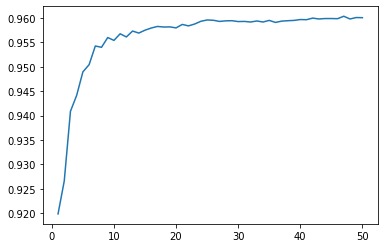

In [29]:
search_param('RandomForestClassifier', 'n_estimators', X_train, y_train, X_test, y_test, area=range(1, 51), seed=15)

#     accuracy  time
1     0.854917  1.867075
2     0.871590  7.085090
3     0.895511  6.487893
4     0.903494  4.129131
5     0.917221  4.879948
6     0.929859  4.457033
7     0.934514  5.827754
8     0.936458  7.451786
9     0.940936  6.165594
10    0.945678  7.729935
11    0.948683  6.759195
12    0.952100  8.411041
13    0.955105  8.353776
14    0.956431  8.099561
15    0.957874  9.145434
16    0.959318  7.928227
17    0.959053  9.621777
18    0.960143  10.431322
19    0.960054  8.304400
20    0.960290  9.718505
21    0.960732  10.406203
22    0.960172  9.525824
23    0.960850  9.817735
24    0.960673  9.346786


23

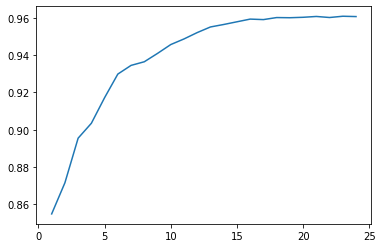

In [30]:
search_param('RandomForestClassifier', 'max_depth', X_train, y_train, X_test, y_test, range(1, 25), seed=15)

#     accuracy  time
2     0.960614  10.574217
3     0.961144  10.007540
4     0.960997  9.967104
5     0.960673  8.507277
6     0.960909  9.887511
7     0.960084  9.837350
8     0.960467  8.328316
9     0.960761  9.698611


3

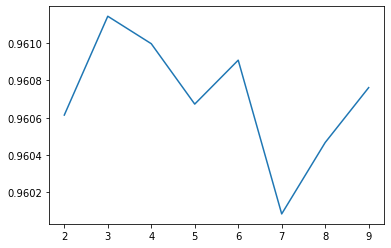

In [31]:
search_param('RandomForestClassifier', 'min_samples_split', X_train, y_train, X_test, y_test, range(2, 10), seed=15)

#     accuracy  time
1     0.960614  10.082613
2     0.959553  8.393233
3     0.958817  9.636509
4     0.957904  9.502517
5     0.956725  8.106153
6     0.955842  9.389495
7     0.955194  8.607989
8     0.954074  8.724786
9     0.953220  9.218698


1

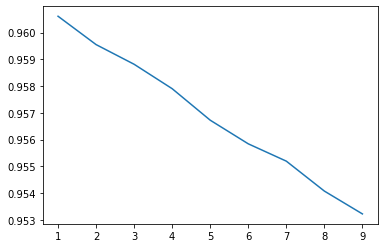

In [32]:
search_param('RandomForestClassifier', 'min_samples_leaf', X_train, y_train, X_test, y_test, range(1, 10), seed=15)

**Cross validation**

In [33]:
rfc = RandomForestClassifier(random_state=15)
param = {'n_estimators': [i for i in range(38, 51)], 'max_depth': [i for i in range(20, 25)]}
gscv =  GridSearchCV(rfc, param, cv=3, n_jobs=-1, verbose=1)
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 65 candidates, totalling 195 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=15), n_jobs=-1,
             param_grid={'max_depth': [20, 21, 22, 23, 24],
                         'n_estimators': [38, 39, 40, 41, 42, 43, 44, 45, 46,
                                          47, 48, 49, 50]},
             verbose=1)

In [34]:
gscv.best_params_

{'max_depth': 22, 'n_estimators': 41}

**Visualization of the importance of features**

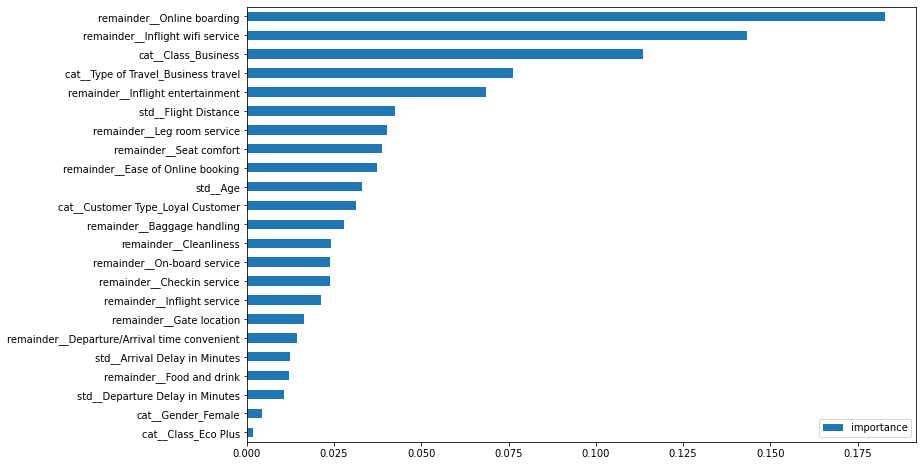

In [35]:
best_c = gscv.best_estimator_
imp = pd.DataFrame(best_c.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [36]:
best_c.score(X_test, y_test)

0.9601131208389796

The plot displays the relationship between the True Positive Rate (TPR) and the False Positive Rate (FPR) of the model.

Random Forest Classifier: ROC AUC=0.993


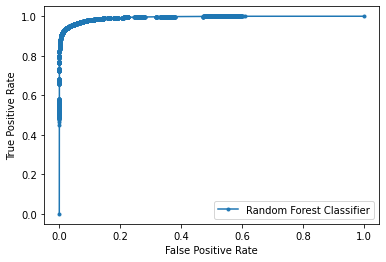

In [46]:
from sklearn.metrics import roc_auc_score , roc_curve
import matplotlib.pyplot as plt
dtc_proba=best_c.predict_proba(X_test)
dtc_proba=dtc_proba[:,1]
auc=roc_auc_score(y_test, dtc_proba)
print('Random Forest Classifier: ROC AUC=%.3f' % (auc))
lr_fpr, lr_tpr, _ = roc_curve([0 if y_test[i] == "neutral or dissatisfied" else 1 for i in range(len(y_test))], dtc_proba)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Interpretation**

Best accuracy is acaheived with the following parameters

max_depth: 22

n_estimators: 41

The best classification score is  0.96

In this case, the AUC score for the Random Forest Classifier model is printed as 0.993, which indicates that the model is performing well. The ROC curve is shown in the plot, and it seems to be above the diagonal line, indicating that the model is better than random. The curve is closer to the ideal curve, which suggests that the model is doing a good job of classifying the positive and negative instances.

**Important features are**

1.   remainder__Online boarding
2.   remainder__Inflight wifi service
3.   cat__Class_Business
4.   cat__Type of Travel_Business travel
5.   remainder__Inflight entertainment	



# XGBoost

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, learning_rate=1.0, max_depth=4)

In [ ]:
# alternatively view the parameters of the xgb trained model
print(xgb_clf)

XGBClassifier(alpha=10, learning_rate=1.0, max_depth=4)


In [ ]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)

In [ ]:
# check accuracy score
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9569


In [ ]:
y_num = []
y_num = [0 if y[i] == "neutral or dissatisfied" else 1 for i in range(len(y))]

**hyperparameters tuning**

In [ ]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

['neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied' ...
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied']
SCORE:
0.8270488422789136
['neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied' ...
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied']
SCORE:
0.8254875390325812
['neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied' ...
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied']
SCORE:
0.8239262357862488
['neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied' ...
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied']
SCORE:
0.8266364225534673
['neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied' ...
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied']
SCORE:
0.8252224120662228
['neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied' ...
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied']
SCORE:
0.8253991633771284
['neutral or dissatisfied' 'satisf

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.6972795191892547, 'gamma': 7.29853819814033, 'max_depth': 5.0, 'min_child_weight': 6.0, 'reg_alpha': 84.0, 'reg_lambda': 0.7450815104091816}


In [ ]:
params = {'colsample_bytree': 0.6972795191892547, 'gamma': 7.29853819814033, 'max_depth': 5, 'min_child_weight': 6.0, 'reg_alpha': 84.0, 'reg_lambda': 0.7450815104091816}

In [ ]:
clf = xgb.XGBClassifier(n_estimators=1000, max_depth=params['max_depth'], gamma=params['gamma'],
                        reg_alpha=params['reg_alpha'], min_child_weight=params['min_child_weight'],
                        colsample_bytree=params['colsample_bytree'])
    
evaluation = [( X_train, y_train), ( X_test, y_test)]
    
clf.fit(X_train, y_train)
    

best_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,best_pred)

In [ ]:
accuracy

0.9497731691510045

In [ ]:
# import XGBoost
import xgboost as xgb

# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y_num)

In [ ]:
from xgboost import cv

#params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                #'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [ ]:
xgb_cv.head()

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.961046       0.000470       0.961046      0.000940
1        0.971062       0.001170       0.971283      0.000908
2        0.975003       0.001425       0.975109      0.002024
3        0.977390       0.000242       0.977463      0.001119
4        0.978294       0.000162       0.978296      0.000834

**Feature importance**

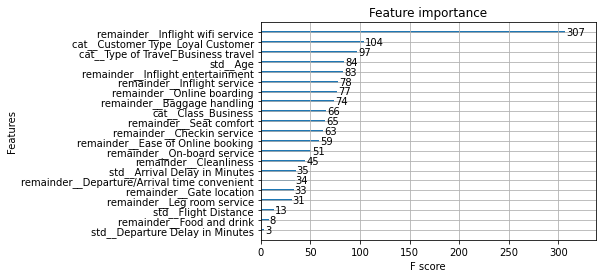

In [ ]:
xgb.plot_importance(clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report
print(classification_report(y_test,best_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.97      0.96     19226
              satisfied       0.96      0.92      0.94     14720

               accuracy                           0.95     33946
              macro avg       0.95      0.95      0.95     33946
           weighted avg       0.95      0.95      0.95     33946



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


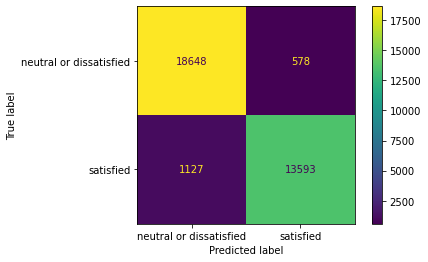

In [ ]:
plot_confusion_matrix(clf,X_test,y_test)


**Interpretation**

Best parameters:

colsample_bytree: 0.6972795191892547

gamma: 7.29853819814033

max_depth' 5.0

min_child_weight: 6.0

reg_alpha': 84.0

reg_lambda: 0.7450815104091816

Accuacy using the best parameters - 0.9498

**Top 5 important features**

1.   remainder_inflight wifi service
2.   cat_Customer Type Loyal Customer
3.   cat_Type of Travel_BusinessTravel
4.   std_Age
5.   remainder_InflightEntertainment

